In [1]:
# generate a vector of random numbers which obeys the given distribution.
#
# n: length of the vector
# mu: mean value
# sigma: standard deviation.
# dist: choices for the distribution, you need to implement at least normal
#       distribution and uniform distribution.
#
# For normal distribution, you can use ``numpy.random.normal`` to generate.
# For uniform distribution, the interval to sample will be [mu - sigma/sqrt(3), mu + sigma/sqrt(3)].

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

In [2]:
def generate_random_numbers(n, mu, sigma, dist="normal"):
    if dist == "normal":
        return np.random.normal(mu, sigma, n)
    elif dist == "uniform":
         return np.random.uniform(mu-sigma/sqrt(3), mu+sigma/sqrt(3),n)
    else:
        raise Exception("The distribution {unknown_dist} is not implemented".format(unknown_dist=dist))

In [3]:
# test your code:
y_test = generate_random_numbers(5, 0, 0.1, "normal")

In [4]:
y1 = generate_random_numbers(105, 0.5, 1.0, "normal")
y2 = generate_random_numbers(105, 0.5, 1.0, "uniform")

In [5]:
# IGD, the ordering is permitted to have replacement.
def IGD_wr_task1(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=True)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    x0=0  
    z=[]
    xk=[x0]
    for k in range(n):
        gk=1/(k+1)
        x1=x0-gk*(x0-y[ordering[k]])
        z.append(1/2*sum((x1-y)**2))
        x0=x1
        xk.append(x1)
    return z,x1,xk


In [6]:
def IGD_wo_task1(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=False)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    x0=0
    z=[]
    xk=[x0]
    for k in range(n):
        gk=1/(k+1)
        x1=x0-gk*(x0-y[ordering[k]])
        z.append(1/2*sum((x1-y)**2))
        x0=x1
        xk.append(x1)
    return z,x1,xk

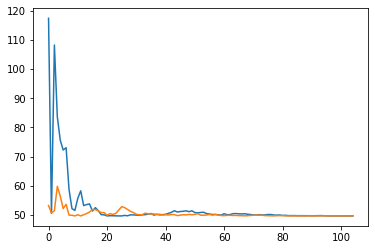

In [7]:
zn1,xk1,x1=IGD_wr_task1(y1)
zn2,xk2,x2=IGD_wo_task1(y1)
for history in [zn1,zn2]:
    plt.plot(history)

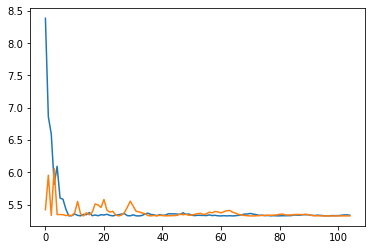

In [8]:
zu1,xku1,x1=IGD_wr_task1(y2)
zu2,xku2,x2=IGD_wo_task1(y2)
for history in [zu1,zu2]:
    plt.plot(history)

In [9]:
beta=np.random.uniform(1,2,50)
y=50
gamma=0.95*min(1/beta)
# IGD, the ordering is permitted to have replacement. 

In [10]:
# IGD, the ordering is permitted to have replacement. 
def IGD_wr_task2(beta,y):
    n = len(beta)
    ordering = np.random.choice(n, n, replace=True)    
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    x0=0
    x=[x0]
    z=[]
    for k in range(n):
        beta_k=beta[ordering[k]]
        x1=x0-gamma*beta_k*(x0-y)
        x0=x1
        z.append(1/2*sum(beta*(x1-y)**2))
        x.append(x1)
    return z,x,x1
# implement the algorithm's iteration of IGD. Your result should return the the final xk
# at the last iteration and also the history of objective function at each xk.

In [11]:
# IGD, the ordering is not permitted to have replacement.
def IGD_wo_task2(beta,y):
    n = len(beta)
    ordering = np.random.choice(n, n, replace=False)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    x0=0
    z=[]
    x=[x0]
    for k in range(n):
        beta_k=beta[ordering[k]]
        x1=x0-gamma*beta_k*(x0-y)
        x0=x1
        z.append(1/2*sum(beta*(x1-y)**2))
        x.append(x1)
    return z,x,x1

In [12]:
z1,xk_1,x_1=IGD_wr_task2(beta,y)

z2,xk_2,x_2=IGD_wo_task2(beta,y)

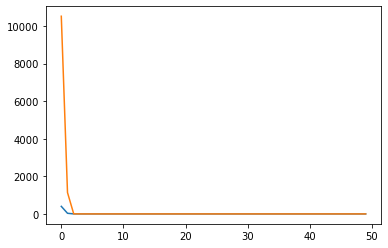

In [13]:
for history in [z1,z2]:
    plt.plot(history)

In [53]:
# generation of exact solution and data y and matrix A.

def generate_problem_task3(m, n, rho):
    A = np.random.normal(0., 1.0, (m, n))
    x = np.random.random(n) # uniform in (0,1)
    w = np.random.normal(0., rho, m)
    y = A@x + w
    return A, x, y

In [54]:
# We generate the problem with 200x100 matrix. rho as 0.01.
#
A, xstar, y = generate_problem_task3(200, 100, 0.01)

In [69]:
def summation(A,x,y):
    s=0
    for i in range(A.shape[0]):
        s+=(A[i,:]@x-y[i])**2
    return s

In [70]:
def IGD_wr_task3(y, A):
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    gamma3=1e-3
    n=A.shape[1]
    ordering = np.random.choice(n, n, replace=True)
    x0=np.zeros(n)
    xk3=[x0]
    z=[]
    for k in range(n):
        ak=A[ordering[k],:]
        x1=x0-gamma3*ak*(ak*x0-y[ordering[k]])
        x0=x1
        xk3.append(np.linalg.norm(x1-xstar))        
        z.append(summation(A,x1,y))
    return z,x1,xk3

In [71]:
def IGD_wo_task3(y, A):
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    gamma3=1e-3
    m,n=A.shape[0],A.shape[1]
    ordering = np.random.choice(n, n, replace=False)
    x0=np.zeros(n)
    xk3=[]
    z=[]
    for k in range(n):
        ak=A[ordering[k],:]
        x1=x0-gamma3*ak*(ak*x0-y[ordering[k]])
        x0=x1
        xk3.append(np.linalg.norm(x1-xstar))
        z.append(summation(A,x1,y))
    return z,x1,xk3

In [72]:
z31,xk31,x31=IGD_wr_task3(y,A)
z32,xk32,x32=IGD_wo_task3(y,A)

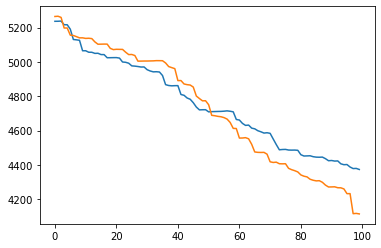

In [73]:
for history in [z31,z32]:
    plt.plot(history)